# 0. Preliminaries

In [1]:
import torch
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

from utils.visualization import show_hm

In [ ]:
def report_visualizations_hm(eval_data, save_dir: str, top_k: int = 5, is_bottleneck: bool = False):
	"""
	Create the heatmaps files from the evaluation data.
	
	Parameters:
	eval_data (dict): Dictionary containing evaluation data with 'hm' key for heatmaps.
	num_samples (int): Number of samples to visualize.
	"""

	if os.path.exists(save_dir):
		print(f"Directory {save_dir} already exists. Please remove it before running the script.")
		return

	if is_bottleneck and 'heatmaps_bottleneck' not in eval_data:
		print("No heatmaps found in the evaluation data for bottleneck layer.")
		return

	heatmaps = eval_data['heatmaps'] if not is_bottleneck else eval_data['heatmaps_bottleneck']
	images = eval_data['images_info'] if not is_bottleneck else eval_data['images_info_bottleneck']

	for idx, ((img_name, data), hm_set) in enumerate(zip(images, heatmaps)):
		# Get parent folder name from img_name (assuming img_name is a path)
		parent_folder = os.path.basename(os.path.dirname(img_name))
		save_path = os.path.join(save_dir, parent_folder)
		os.makedirs(save_path, exist_ok=True)

		# Save original image
		print(f"Processing {img_name}...")
		img = mpimg.imread(img_name)
		img_save_path = os.path.join(save_path, f"{os.path.splitext(os.path.basename(img_name))[0]}_orig.png")
		plt.imsave(img_save_path, img)

		# Visualize and save top_k heatmaps if available
		for i in range(min(top_k, hm_set.shape[0])):
			hm_save_path = os.path.join(save_path, f"{os.path.splitext(os.path.basename(img_name))[0]}_hm_{i}.png")
			show_hm(hm_set[i], data, save_path=hm_save_path)

def visualize_sample(list_save_dirs):
	"""
	Visualize 5 first heatmaps from subfolder Adenocarcinoma_ductal for each save
	directory.
	"""
	for save_dir in list_save_dirs:
		# Construct the path to the specific subfolder
		subfolder_path = os.path.join(save_dir, "Adenocarcinoma_ductal")
		if not os.path.exists(subfolder_path):
			print(f"Subfolder {subfolder_path} does not exist.")
			continue

		# Get a list of all heatmap files in the subfolder
		heatmap_files = glob.glob(os.path.join(subfolder_path, "*_hm_*.png"))
		heatmap_files.sort()  # Sort files to ensure consistent ordering

		print("Showing information for:", save_dir)

		# Visualize the first 15 heatmaps in groups of 5 horizontally
		hm_to_show = heatmap_files[:15]
		for i in range(0, len(hm_to_show), 5):
			group = hm_to_show[i:i+5]
			if group:
				fig, axes = plt.subplots(1, len(group), figsize=(4 * len(group), 4))
				if len(group) == 1:
					axes = [axes]
				for ax, hm_file in zip(axes, group):
					hm = mpimg.imread(hm_file)
					ax.imshow(hm, cmap='jet')
					ax.axis('off')
					ax.set_title(f"{os.path.basename(hm_file)}")
				plt.tight_layout()
				plt.show()

# 1. Propuesta

In [3]:
eval_data = torch.load('saved/models/xMI-Efficient-reduced/0705_223924/test_dict.pth')
save_dir = 'tmp/xmi_cov/'
save_dir_bottleneck = 'tmp/xmi_cov_bottleneck/'

In [ ]:
report_visualizations_hm(eval_data, save_dir)
report_visualizations_hm(eval_data, save_dir_bottleneck, is_bottleneck=True)

Directory tmp/xmi_cov/ already exists. Please remove it before running the script.
Directory tmp/xmi_cov_bottleneck/ already exists. Please remove it before running the script.


# 2. Baseline

In [5]:
eval_data_baseline = torch.load('saved/models/fCRP-prostate-reduced/0703_222008/test_dict.pth')
save_dir_baseline = 'tmp/reduced_baseline/'
save_dir_baseline_bottleneck = 'tmp/reduced_baseline_bottleneck/'

In [ ]:
report_visualizations_hm(eval_data_baseline, save_dir_baseline)
report_visualizations_hm(eval_data_baseline, save_dir_baseline_bottleneck, is_bottleneck=True)

Directory tmp/reduced_baseline/ already exists. Please remove it before running the script.
No heatmaps found in the evaluation data for bottleneck layer.


# 3. Propuesta (-L2)

In [7]:
eval_data_l2 = torch.load('data/eval_dict_-l2.pth')
save_dir_l2 = 'tmp/eval_vis_l2/'

In [ ]:
report_visualizations_hm(eval_data_l2, save_dir_l2)

Directory tmp/eval_vis_l2/ already exists. Please remove it before running the script.


# 4. Propuesta (-cov)

In [9]:
eval_data_cov = torch.load('saved/models/xMI-Efficient-reduced/0706_113047/test_dict.pth')
save_dir_cov = 'tmp/eval_-cov/'
save_dir_cov_bottleneck = 'tmp/eval_-cov_bottleneck/'

In [10]:
report_visualizations_hm(eval_data_cov, save_dir_cov)
report_visualizations_hm(eval_data_cov, save_dir_cov_bottleneck, is_bottleneck=True)

Directory tmp/eval_-cov/ already exists. Please remove it before running the script.
Directory tmp/eval_-cov_bottleneck/ already exists. Please remove it before running the script.


# 5. Propuesta (-mi_layer)

In [11]:
eval_data_ortho = torch.load('data/eval_dict_ortho.pth')
save_dir_ortho = 'tmp/eval_vis_ortho/'

In [ ]:
report_visualizations_hm(eval_data_ortho, save_dir_ortho)

Directory tmp/eval_vis_ortho/ already exists. Please remove it before running the script.


# Z. Análisis conjunto

## Z.1. Visualizaciones

In [13]:
# visualize_sample([
# 	save_dir_baseline,
# 	save_dir_cov,
# 	save_dir,
# 	save_dir_baseline_bottleneck,
# 	save_dir_cov_bottleneck,
# 	save_dir_bottleneck
# ])

## Z.2. Tablas conjuntas

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
model_data = {
	"baseline": {
		"accuracy": eval_data_baseline['accuracy'],
		"rmse": eval_data_baseline['mean_euclidean_distance'],
		"kl_divergence": eval_data_baseline['kl_divergence'][5]
	},
	# "l2": {
	# 	"accuracy": eval_data_l2['accuracy'],
	# 	"rmse": eval_data_l2['mean_euclidean_distance']
	# },
	"-cov": {
		"accuracy": eval_data_cov['accuracy'],
		"rmse": eval_data_cov['mean_euclidean_distance'],
		"kl_divergence": eval_data_cov['kl_divergence'][5],
		"kl_divergence_bottleneck": eval_data_cov['kl_divergence_bottleneck'][5]
	},
	"propuesta": {
		"accuracy": eval_data['accuracy'],
		"rmse": eval_data['mean_euclidean_distance'],
		"kl_divergence": eval_data['kl_divergence'][5],
		"kl_divergence_bottleneck": eval_data['kl_divergence_bottleneck'][5]
	}
}

pd.DataFrame(model_data).T

,accuracy,rmse,kl_divergence,kl_divergence_bottleneck
baseline,0.747904,457.340820,0.000077,NaN
-cov,0.752530,457.904175,0.000096,0.000073
propuesta,0.759179,437.364197,0.000091,0.000064


In [16]:
def plot_top_k_relevances(eval_data_dict, k = 8, is_bottleneck=False, model_name=''):
	field_name = 'relevances_bottleneck' if is_bottleneck else 'relevances'
	relevances = eval_data[field_name][0]
	if isinstance(relevances, torch.Tensor):
		relevances = relevances.detach().cpu().numpy().flatten()

	top_indices = relevances.argsort()[-k:][::-1]
	top_values = relevances[top_indices]

	plt.figure(figsize=(8, 4))
	plt.bar(range(k), top_values)
	plt.xticks(range(k), [f'C{i}' for i in top_indices])
	plt.ylabel('Relevance')
	plt.title(f'{model_name}.Top {k} Feature Relevances ({"Bottleneck" if is_bottleneck else "Conv Layer"})')
	plt.show()

Baseline


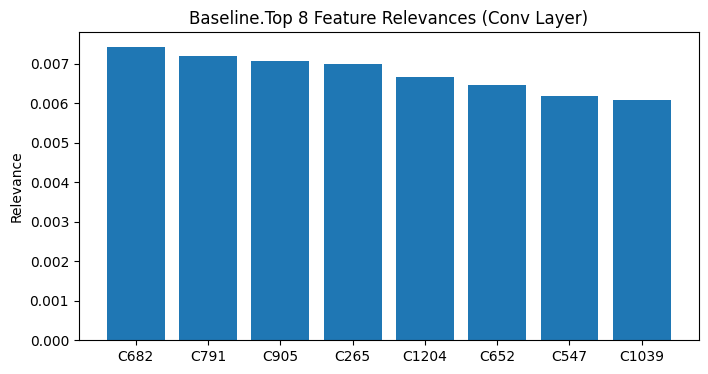

Proposal (bottleneck layer)


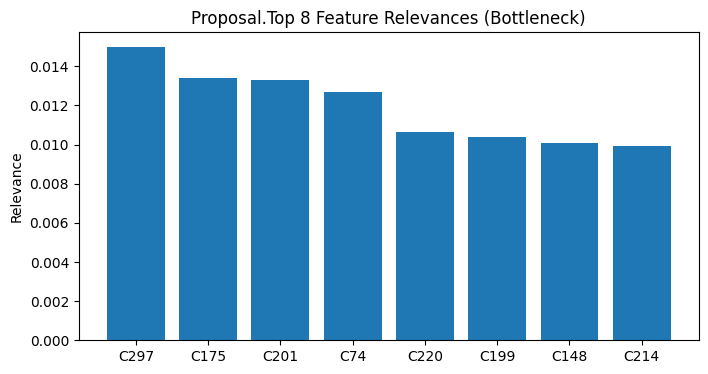

In [17]:
print("Baseline")
plot_top_k_relevances(eval_data_baseline, k=8, model_name='Baseline')
# print("Proposal (conv layer)")
# plot_top_k_relevances(eval_data, k=8, model_name='Proposal')
print("Proposal (bottleneck layer)")
plot_top_k_relevances(eval_data, k=8, is_bottleneck=True, model_name='Proposal')

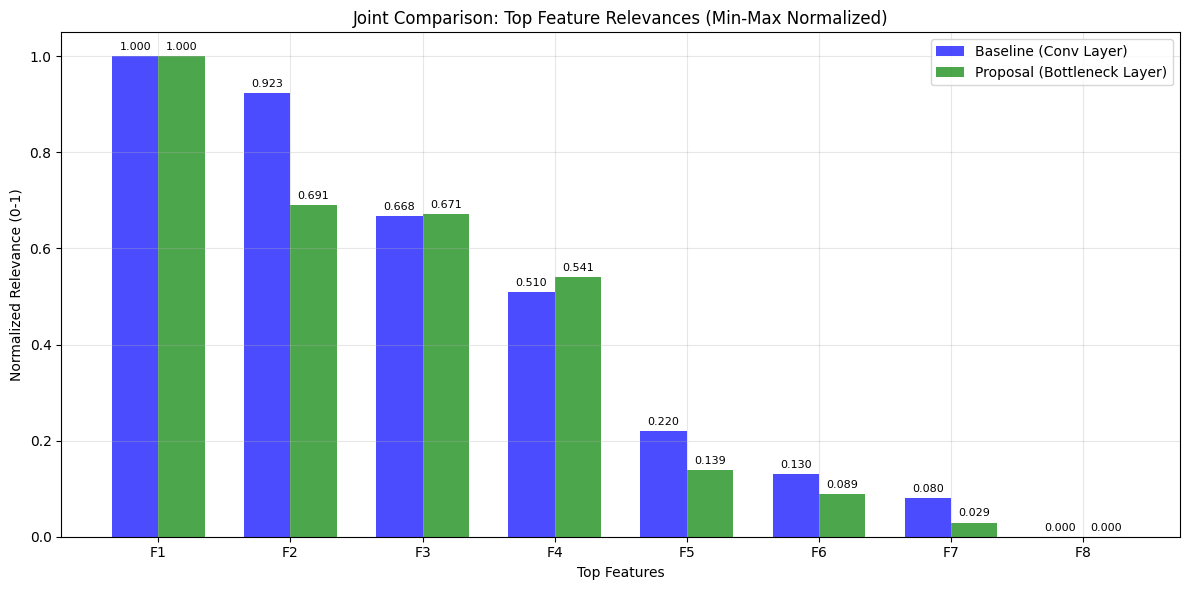


Baseline - Top 8 Channel Indices:
  F1: Channel 956 (normalized: 1.000)
  F2: Channel 5 (normalized: 0.923)
  F3: Channel 395 (normalized: 0.668)
  F4: Channel 439 (normalized: 0.510)
  F5: Channel 1298 (normalized: 0.220)
  F6: Channel 775 (normalized: 0.130)
  F7: Channel 1384 (normalized: 0.080)
  F8: Channel 312 (normalized: 0.000)

Proposal - Top 8 Channel Indices:
  F1: Channel 297 (normalized: 1.000)
  F2: Channel 175 (normalized: 0.691)
  F3: Channel 201 (normalized: 0.671)
  F4: Channel 74 (normalized: 0.541)
  F5: Channel 220 (normalized: 0.139)
  F6: Channel 199 (normalized: 0.089)
  F7: Channel 148 (normalized: 0.029)
  F8: Channel 214 (normalized: 0.000)


In [18]:
import numpy as np

def plot_joint_relevances(eval_data_baseline, eval_data_proposal, k=8, model_names=['Baseline', 'Proposal']):
    """
    Plot relevances from two models jointly with min-max normalization.
    """
    # Get relevances for baseline (conv layer)
    relevances_baseline = eval_data_baseline['relevances'][0]
    if isinstance(relevances_baseline, torch.Tensor):
        relevances_baseline = relevances_baseline.detach().cpu().numpy().flatten()
    
    # Get relevances for proposal (bottleneck layer)
    relevances_proposal = eval_data['relevances_bottleneck'][0]
    if isinstance(relevances_proposal, torch.Tensor):
        relevances_proposal = relevances_proposal.detach().cpu().numpy().flatten()
    
    # Get top k indices for each model
    top_indices_baseline = relevances_baseline.argsort()[-k:][::-1]
    top_values_baseline = relevances_baseline[top_indices_baseline]
    
    top_indices_proposal = relevances_proposal.argsort()[-k:][::-1]
    top_values_proposal = relevances_proposal[top_indices_proposal]
    
    # Min-max normalization to (0,1)
    def min_max_normalize(values):
        return (values - values.min()) / (values.max() - values.min())
    
    norm_baseline = min_max_normalize(top_values_baseline)
    norm_proposal = min_max_normalize(top_values_proposal)
    
    # Create the joint plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Bar width and positions
    bar_width = 0.35
    x_baseline = np.arange(k)
    x_proposal = x_baseline + bar_width
    
    # Plot bars
    bars1 = ax.bar(x_baseline, norm_baseline, bar_width, 
                   label=f'{model_names[0]} (Conv Layer)', color='blue', alpha=0.7)
    bars2 = ax.bar(x_proposal, norm_proposal, bar_width, 
                   label=f'{model_names[1]} (Bottleneck Layer)', color='green', alpha=0.7)
    
    # Customize the plot
    ax.set_xlabel('Top Features')
    ax.set_ylabel('Normalized Relevance (0-1)')
    ax.set_title('Joint Comparison: Top Feature Relevances (Min-Max Normalized)')
    ax.set_xticks(x_baseline + bar_width / 2)
    ax.set_xticklabels([f'F{i+1}' for i in range(k)])
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add value labels on bars
    def add_value_labels(bars, values):
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.annotate(f'{value:.3f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8)
    
    add_value_labels(bars1, norm_baseline)
    add_value_labels(bars2, norm_proposal)
    
    plt.tight_layout()
    plt.show()
    
    # Print the actual channel indices for reference
    print(f"\n{model_names[0]} - Top {k} Channel Indices:")
    for i, (idx, val) in enumerate(zip(top_indices_baseline, norm_baseline)):
        print(f"  F{i+1}: Channel {idx} (normalized: {val:.3f})")
    
    print(f"\n{model_names[1]} - Top {k} Channel Indices:")
    for i, (idx, val) in enumerate(zip(top_indices_proposal, norm_proposal)):
        print(f"  F{i+1}: Channel {idx} (normalized: {val:.3f})")

# Call the function
plot_joint_relevances(eval_data_baseline, eval_data, k=8, model_names=['Baseline', 'Proposal'])


Relevance Statistics:
Baseline (Conv Layer):
  Mean: 0.069
  Std:  0.101
  Median: 0.032
  95th percentile: 0.271

Proposal (Bottleneck Layer):
  Mean: 0.081
  Std:  0.097
  Median: 0.048
  95th percentile: 0.250

-cov (Bottleneck Layer):
  Mean: 0.083
  Std:  0.102
  Median: 0.045
  95th percentile: 0.274

Key Interpretations:
  50% of neurons have relevance < 0.032 (Baseline)
  50% of neurons have relevance < 0.048 (Proposal)
  50% of neurons have relevance < 0.045 (-cov)
  75% of neurons have relevance < 0.086 (Baseline)
  75% of neurons have relevance < 0.118 (Proposal)
  75% of neurons have relevance < 0.120 (-cov)
  90% of neurons have relevance < 0.178 (Baseline)
  90% of neurons have relevance < 0.196 (Proposal)
  90% of neurons have relevance < 0.217 (-cov)
  95% of neurons have relevance < 0.271 (Baseline)
  95% of neurons have relevance < 0.250 (Proposal)
  95% of neurons have relevance < 0.274 (-cov)


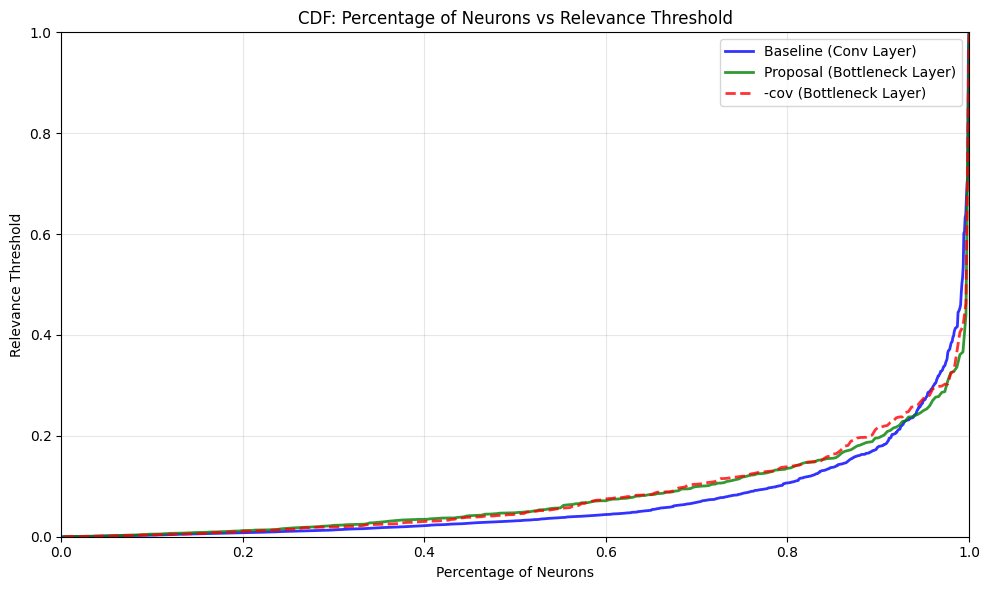

In [46]:
def plot_cdf_relevances(eval_data_baseline, eval_data, eval_data_cov, model_names=['Baseline', 'Proposal', '-cov']):
    """
    Plot CDF of normalized relevances for multiple models.
    Point (x,y) represents: x percentage of neurons have relevance lower than y
    """
    # Get all relevances for baseline (conv layer)
    relevances_baseline = eval_data_baseline['relevances'][0]
    if isinstance(relevances_baseline, torch.Tensor):
        relevances_baseline = relevances_baseline.detach().cpu().numpy().flatten()
    
    # Get all relevances for proposal (bottleneck layer)
    relevances_proposal = eval_data['relevances_bottleneck'][0]
    if isinstance(relevances_proposal, torch.Tensor):
        relevances_proposal = relevances_proposal.detach().cpu().numpy().flatten()
    
    # Get all relevances for -cov (bottleneck layer)
    relevances_cov = eval_data_cov['relevances_bottleneck'][0]
    if isinstance(relevances_cov, torch.Tensor):
        relevances_cov = relevances_cov.detach().cpu().numpy().flatten()
    
    # Min-max normalization to (0,1)
    def min_max_normalize(values):
        # return (values - values.min()) / (values.max() - values.min())
        return np.abs(values) / np.linalg.norm(values, ord=np.inf)  # Normalize by max absolute value
    
    norm_baseline = min_max_normalize(relevances_baseline)
    norm_proposal = min_max_normalize(relevances_proposal)
    norm_cov = min_max_normalize(relevances_cov)
    
    # Create CDF plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Sort values for CDF
    sorted_baseline = np.sort(norm_baseline)
    sorted_proposal = np.sort(norm_proposal)
    sorted_cov = np.sort(norm_cov)
    
    # Create CDF values (cumulative probabilities)
    cdf_baseline = np.arange(1, len(sorted_baseline) + 1) / len(sorted_baseline)
    cdf_proposal = np.arange(1, len(sorted_proposal) + 1) / len(sorted_proposal)
    cdf_cov = np.arange(1, len(sorted_cov) + 1) / len(sorted_cov)
    
    # Plot CDFs
    ax.plot(cdf_baseline, sorted_baseline, label=f'{model_names[0]} (Conv Layer)', color='blue', linewidth=2, alpha=0.8)
    ax.plot(cdf_proposal, sorted_proposal, label=f'{model_names[1]} (Bottleneck Layer)', color='green', linewidth=2, alpha=0.8)
    ax.plot(cdf_cov, sorted_cov, label=f'{model_names[2]} (Bottleneck Layer)', color='red', linewidth=2, alpha=0.8, linestyle='dashed')
    
    # Customize the plot
    ax.set_xlabel('Percentage of Neurons')
    ax.set_ylabel('Relevance Threshold')
    ax.set_title('CDF: Percentage of Neurons vs Relevance Threshold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    # # Add some key percentile lines
    # percentiles = [0.25, 0.5, 0.75, 0.9, 0.95]
    # for p in percentiles:
    #     baseline_val = np.percentile(norm_baseline, p * 100)
    #     proposal_val = np.percentile(norm_proposal, p * 100)
    #     cov_val = np.percentile(norm_cov, p * 100)
    #     ax.axhline(y=baseline_val, color='blue', linestyle='--', alpha=0.3)
    #     ax.axhline(y=proposal_val, color='green', linestyle='--', alpha=0.3)
    #     ax.axhline(y=cov_val, color='orange', linestyle='--', alpha=0.3)
    #     ax.axvline(x=p, color='gray', linestyle=':', alpha=0.5)
    
    # Add some statistics
    print(f"\nRelevance Statistics:")
    print(f"{model_names[0]} (Conv Layer):")
    print(f"  Mean: {norm_baseline.mean():.3f}")
    print(f"  Std:  {norm_baseline.std():.3f}")
    print(f"  Median: {np.median(norm_baseline):.3f}")
    print(f"  95th percentile: {np.percentile(norm_baseline, 95):.3f}")
    
    print(f"\n{model_names[1]} (Bottleneck Layer):")
    print(f"  Mean: {norm_proposal.mean():.3f}")
    print(f"  Std:  {norm_proposal.std():.3f}")
    print(f"  Median: {np.median(norm_proposal):.3f}")
    print(f"  95th percentile: {np.percentile(norm_proposal, 95):.3f}")
    
    print(f"\n{model_names[2]} (Bottleneck Layer):")
    print(f"  Mean: {norm_cov.mean():.3f}")
    print(f"  Std:  {norm_cov.std():.3f}")
    print(f"  Median: {np.median(norm_cov):.3f}")
    print(f"  95th percentile: {np.percentile(norm_cov, 95):.3f}")
    
    # Print some key interpretations
    print(f"\nKey Interpretations:")
    for p in [0.5, 0.75, 0.9, 0.95]:
        baseline_val = np.percentile(norm_baseline, p * 100)
        proposal_val = np.percentile(norm_proposal, p * 100)
        cov_val = np.percentile(norm_cov, p * 100)
        print(f"  {p*100:.0f}% of neurons have relevance < {baseline_val:.3f} ({model_names[0]})")
        print(f"  {p*100:.0f}% of neurons have relevance < {proposal_val:.3f} ({model_names[1]})")
        print(f"  {p*100:.0f}% of neurons have relevance < {cov_val:.3f} ({model_names[2]})")
    
    plt.tight_layout()
    plt.show()

# Plot the CDF
plot_cdf_relevances(eval_data_baseline, eval_data, eval_data_cov)

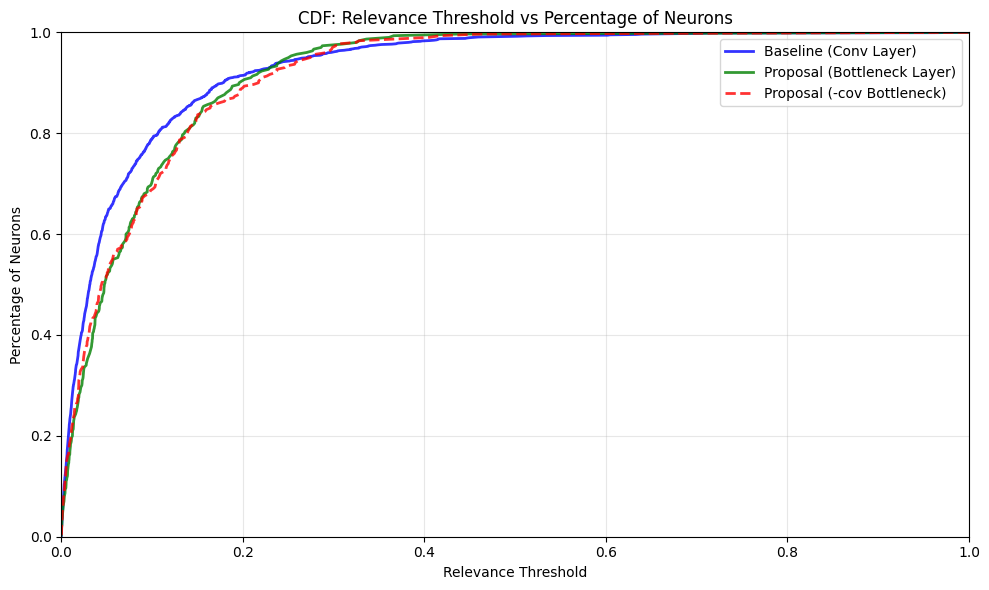

In [48]:
def plot_cdf_relevances_inverted(eval_data_baseline, eval_data, eval_data_cov, model_names=['Baseline', 'Proposal', '-cov']):
	"""
	Plot CDF of normalized relevances for multiple models, with axes inverted.
	Point (x,y) represents: y percentage of neurons have relevance lower than x
	"""
	# Helper to extract and normalize relevances
	def get_norm_relevances(eval_data, field='relevances'):
		relevances = eval_data[field][0]
		if isinstance(relevances, torch.Tensor):
			relevances = relevances.detach().cpu().numpy().flatten()
		
		relevances = np.abs(relevances)
		# return relevances / np.linalg.norm(relevances, ord=np.inf)
		# Min-max normalization to (0,1)
		return (relevances - relevances.min()) / (relevances.max() - relevances.min())

	norm_baseline = get_norm_relevances(eval_data_baseline, 'relevances')
	norm_proposal = get_norm_relevances(eval_data, 'relevances_bottleneck')
	norm_cov = get_norm_relevances(eval_data_cov, 'relevances_bottleneck')

	# Sort values for CDF
	sorted_baseline = np.sort(norm_baseline)
	sorted_proposal = np.sort(norm_proposal)
	sorted_cov = np.sort(norm_cov)
	cdf_baseline = np.arange(1, len(sorted_baseline) + 1) / len(sorted_baseline)
	cdf_proposal = np.arange(1, len(sorted_proposal) + 1) / len(sorted_proposal)
	cdf_cov = np.arange(1, len(sorted_cov) + 1) / len(sorted_cov)

	fig, ax = plt.subplots(figsize=(10, 6))
	ax.plot(sorted_baseline, cdf_baseline, label=f'{model_names[0]} (Conv Layer)', color='blue', linewidth=2, alpha=0.8)
	ax.plot(sorted_proposal, cdf_proposal, label=f'{model_names[1]} (Bottleneck Layer)', color='green', linewidth=2, alpha=0.8)
	ax.plot(sorted_cov, cdf_cov, label=f'{model_names[1]} (-cov Bottleneck)', color='red', linewidth=2, alpha=0.8, linestyle='dashed')

	# Customize the plot
	ax.set_xlabel('Relevance Threshold')
	ax.set_ylabel('Percentage of Neurons')
	ax.set_title('CDF: Relevance Threshold vs Percentage of Neurons')
	ax.legend()
	ax.grid(True, alpha=0.3)
	ax.set_xlim(0, 1)
	ax.set_ylim(0, 1)
	plt.tight_layout()
	plt.show()

# Plot the CDF with axes inverted
plot_cdf_relevances_inverted(eval_data_baseline, eval_data, eval_data_cov, model_names=['Baseline', 'Proposal'])

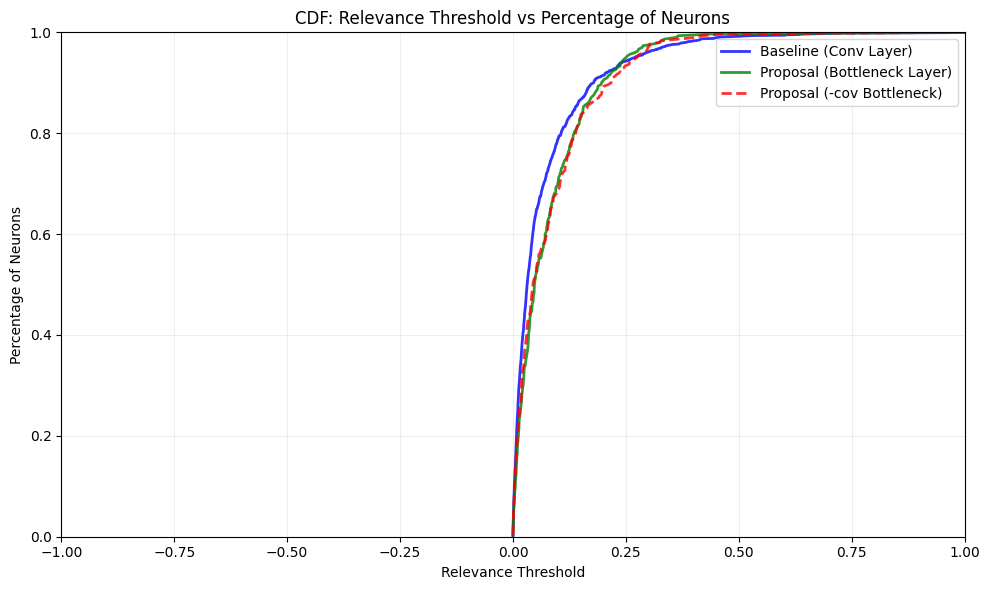

In [50]:
model_names=['Baseline', 'Proposal', '-cov']

# Helper to extract and normalize relevances
def get_norm_relevances(eval_data, field='relevances'):
	relevances = eval_data[field][0]
	if isinstance(relevances, torch.Tensor):
		relevances = relevances.detach().cpu().numpy().flatten()
	
	relevances = np.abs(relevances)	
	# Min-max normalization to (0,1)
	return (relevances - relevances.min()) / (relevances.max() - relevances.min())

norm_baseline = get_norm_relevances(eval_data_baseline, 'relevances')
norm_proposal = get_norm_relevances(eval_data, 'relevances_bottleneck')
norm_cov = get_norm_relevances(eval_data_cov, 'relevances_bottleneck')

# Sort values for CDF
sorted_baseline = np.sort(norm_baseline)
sorted_proposal = np.sort(norm_proposal)
sorted_cov = np.sort(norm_cov)
cdf_baseline = np.arange(1, len(sorted_baseline) + 1) / len(sorted_baseline)
cdf_proposal = np.arange(1, len(sorted_proposal) + 1) / len(sorted_proposal)
cdf_cov = np.arange(1, len(sorted_cov) + 1) / len(sorted_cov)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sorted_baseline, cdf_baseline, label=f'{model_names[0]} (Conv Layer)', color='blue', linewidth=2, alpha=0.8)
ax.plot(sorted_proposal, cdf_proposal, label=f'{model_names[1]} (Bottleneck Layer)', color='green', linewidth=2, alpha=0.8)
ax.plot(sorted_cov, cdf_cov, label=f'{model_names[1]} (-cov Bottleneck)', color='red', linewidth=2, alpha=0.8, linestyle='dashed')

# Customize the plot
ax.set_xlabel('Relevance Threshold')
ax.set_ylabel('Percentage of Neurons')
ax.set_title('CDF: Relevance Threshold vs Percentage of Neurons')
ax.legend()
ax.grid(True, alpha=0.2)
ax.set_xlim(-1, 1)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()


In [56]:
print("AUC Baseline:", np.mean(norm_baseline))
print("AUC Proposal:", np.mean(norm_proposal))
print("AUC -cov:", np.mean(norm_cov))

AUC Baseline: 0.06895664
AUC Proposal: 0.081437565
AUC -cov: 0.08322143


In [57]:
norm_baseline.shape

(1408,)

In [58]:
norm_proposal.shape

(300,)

In [40]:
sorted_baseline

array([-1.        , -0.96189934, -0.67367804, ...,  0.6390867 ,
        0.6987176 ,  0.716747  ], dtype=float32)